In [1]:

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
import matplotlib.colors as colors
from matplotlib import rcParams
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t = 13.78e9               #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
ρ_m  = 4e19                #ρ_m=4e19 M☉ Gpc^-3
t_m = 13.78e9             #in units of yr 
σ_eq = 0.005



m_1 = 7       #in units of M☉
m_2 = 9      #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)




m_min = 5     #in units of M☉
m_max = 100   # in units of M☉

X_min = 1e-15
X_max = 1e5


m_1 = m_1_list[-1] 
m_2 = m_2_list[0]
Δ_1 = Δ_1_list[-1]
Δ_2 = Δ_2_list[0]
X = 1e-10

file = np.load('tm_ofj0_PWRhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


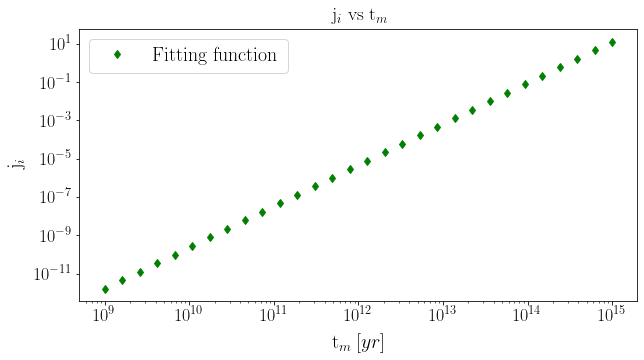

In [2]:
def ji_fitting_function(t_m):
    m = file['arr_0']
    b = file['arr_1']
    return (10**(-b/m))   * (t_m**(1/m))   # t_m = (j_i**m) * (10**b)
        
    
    
tm_list_1 = (np.geomspace(1e9, 1e15, 30)).tolist()
ji_list = np.zeros(len(tm_list_1))



for i, t_m in enumerate(tm_list_1):
    ji_list[i] = ji_fitting_function(t_m)
    

    
plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.loglog(tm_list_1, ji_list, 'gd' )



plt.legend([ "Fitting function"], loc = 'upper left', fontsize = 20)
plt.xlabel('t$_{m}$$\: [yr]$', fontsize = 20, labelpad = 9)
plt.ylabel('j$_{i}$', fontsize = 20, labelpad = 9)
plt.title('j$_{i}$ vs t$_{m}$', fontsize = 19, pad = 9)
plt.show()    
    

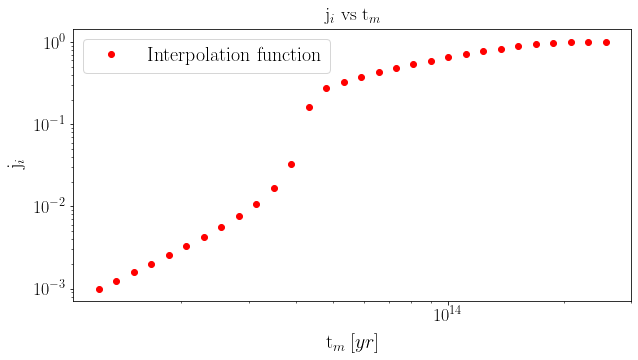

In [3]:
def ji_interpolation(t_m):
    g =  InterpolatedUnivariateSpline(tm_ref_list, ji_ref_list, ext = 2, k= 2) # j_i = g(t_m)
    return g(t_m)   
        
    

    

tm_ref_list = file['arr_4']
tm_min = np.min(tm_ref_list )
tm_max  = np.max(tm_ref_list)
 
    
               
                 
tm_list_2 = (np.geomspace(tm_min, tm_max , 30)).tolist()
ji_interpolation_list = np.zeros(len(tm_list_2))



for i, t_m in enumerate(tm_list_2):
    ji_interpolation_list[i] = ji_interpolation(t_m)
    

    
   
plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.loglog(tm_list_2, ji_interpolation_list, 'ro' )



plt.legend([ "Interpolation function"], loc = 'upper left', fontsize = 20)
plt.xlabel('t$_{m}$$\: [yr]$', fontsize = 20, labelpad = 9)
plt.ylabel('j$_{i}$', fontsize = 20, labelpad = 9)
plt.title('j$_{i}$ vs t$_{m}$', fontsize = 19, pad = 9)
plt.show()    
    

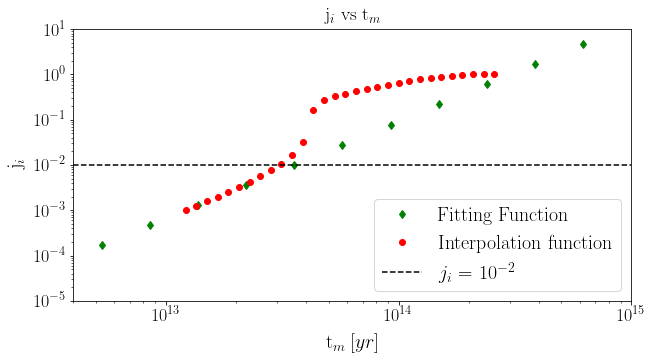

In [4]:
plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.loglog(tm_list_1, ji_list, 'gd' )
plt.loglog(tm_list_2, ji_interpolation_list, 'ro' )


plt.xlim(4e12, 1e15)
plt.ylim(1e-5, 10)

plt.axhline(y = 1e-2, color='k', linestyle='--')


plt.legend([ "Fitting Function",  "Interpolation function", "$j_{i}$ = $10^{-2}$"], loc = 'lower right', fontsize = 20)
plt.xlabel('t$_{m}$$\: [yr]$', fontsize = 20, labelpad = 9)
plt.ylabel('j$_{i}$', fontsize = 20, labelpad = 9)
plt.title('j$_{i}$ vs t$_{m}$', fontsize = 19, pad = 9)
plt.savefig('j_ivst_m.pdf', bbox_inches = 'tight')
plt.show()    
    

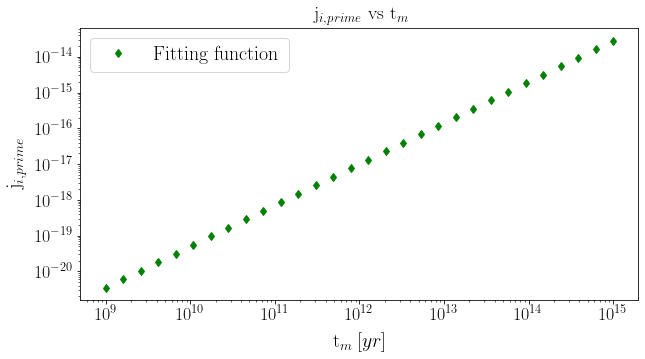

In [5]:
def ji_prime_fitting_function(t_m):
    m = file['arr_0']
    b = file['arr_1']
    return (1/m)  * (10**(-b/m)) * (t_m**(-(m-1)/m))
                                                     # t_m = (j_i**m) * (10**b)
        
    
    
tm_list = (np.geomspace(1e9, 1e15, 30)).tolist()
ji_prime_list = np.zeros(len(tm_list))



for i, t_m in enumerate(tm_list):
    ji_prime_list[i] = ji_prime_fitting_function(t_m)
    

    
   
plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.loglog(tm_list, ji_prime_list, 'gd' )



plt.legend([ "Fitting function"], loc = 'upper left', fontsize = 20)
plt.xlabel('t$_{m}$$\: [yr]$', fontsize = 20, labelpad = 9)
plt.ylabel('j$_{i,prime}$', fontsize = 20, labelpad = 9)
plt.title('j$_{i,prime}$ vs t$_{m}$', fontsize = 19, pad = 9)
plt.show()    
    

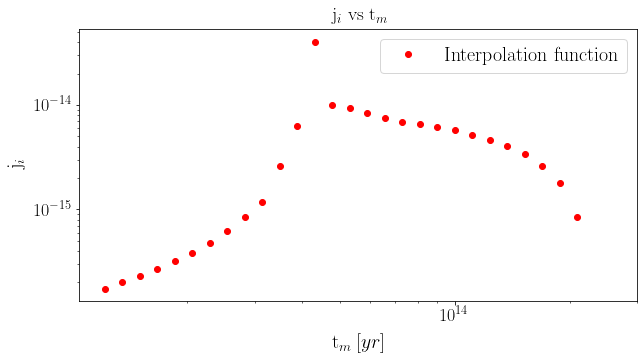

In [7]:
def ji_prime_interpolation(t_m):
    g =  InterpolatedUnivariateSpline(tm_ref_list, ji_ref_list, ext = 2, k= 2) # j_i = g(t_m)
    g_prime = g.derivative()
    return g_prime(t_m)   
        
    

    

tm_ref_list = file['arr_4']
tm_min = np.min(tm_ref_list )
tm_max  = np.max(tm_ref_list)
 
    
               
                 
tm_list_2 = (np.geomspace(tm_min, tm_max , 30)).tolist()
ji_prime_interpolation_list = np.zeros(len(tm_list_2))



for i, t_m in enumerate(tm_list_2):
    ji_prime_interpolation_list[i] = ji_prime_interpolation(t_m)
    

    
   
plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.loglog(tm_list_2, ji_prime_interpolation_list, 'ro' )



plt.legend([ "Interpolation function"], loc = 'upper right', fontsize = 20)
plt.xlabel('t$_{m}$$\: [yr]$', fontsize = 20, labelpad = 9)
plt.ylabel('j$_{i}$', fontsize = 20, labelpad = 9)
plt.title('j$_{i}$ vs t$_{m}$', fontsize = 19, pad = 9)
plt.show()    
    

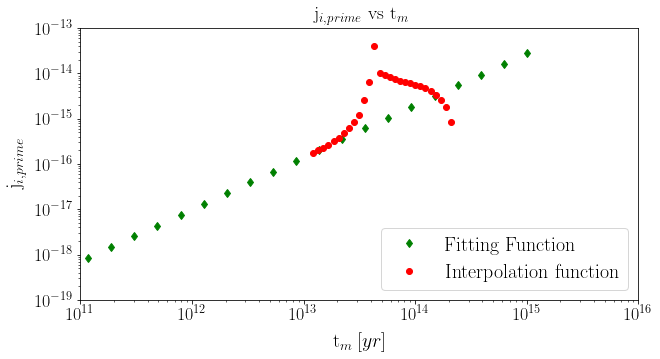

In [8]:
plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.loglog(tm_list, ji_prime_list, 'gd' )
plt.loglog(tm_list_2, ji_prime_interpolation_list, 'ro' )


plt.xlim(1e11, 1e16)
plt.ylim(1e-19, 1e-13)





plt.legend([ "Fitting Function",  "Interpolation function"], loc = 'lower right', fontsize = 20)
plt.xlabel('t$_{m}$$\: [yr]$', fontsize = 20, labelpad = 9)
plt.ylabel('j$_{i, prime}$', fontsize = 20, labelpad = 9)
plt.title('j$_{i, prime}$ vs t$_{m}$', fontsize = 19, pad = 9)
plt.savefig('j_iprimevst_m.pdf', bbox_inches = 'tight')
plt.show()    
    